In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

def wordCharacterToUnicode(arr, arrOutput):
  for i in range(0, len(arr)):
    temp = arr[i];
    count = 0
    for j in temp:
      arrOutput[i][count]= ord(j) - 2400
      count = count + 1

def labelToDataframe(arry, arryoutput):
  for i in range (0, len(arry)):
    for j in range (0, len(arry[i])):
      temp = arry[i][j]
      if (temp!= None):
        arryoutput.loc[i][temp] = 1

data = pd.read_csv('inputbn.csv', sep=',', engine='python', header=0)
data = data.to_numpy()

x_sample = data[:,0]
y_sample = data[:,1:10]
temp = np.zeros(shape = (100, 46))

X = np.zeros(shape = (100, 10))
wordCharacterToUnicode(x_sample, X)
temp = np.zeros(shape = (100, 46))
df = pd.DataFrame(temp, columns=['অ','আ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','খ','গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়'])
labelToDataframe(y_sample, df)
print(X[0:5])
print(df.head(5))

trainX, testX, trainy, testy = train_test_split(X, df, test_size=0.4)

Using TensorFlow backend.


[[ 76.  82.  94.   0.   0.   0.   0.   0.   0.   0.]
 [ 53.  69.  94.   0.   0.   0.   0.   0.   0.   0.]
 [ 39.  82.  95.  86.   0.   0.   0.   0.   0.   0.]
 [ 76.  94.  82.  95.  53.  94.   0.   0.   0.   0.]
 [ 78.  72. 103.   0.   0.   0.   0.   0.   0.   0.]]
     অ    আ    ই    ঈ    উ    ঊ    ঋ  ...    শ    ষ    স    হ    ড়    ঢ়    য়
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 46 columns]


In [ ]:

#define model
model = Sequential()
model.add(Dense(128, input_shape=(10,), activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(46, activation='sigmoid'))
model.summary()

# compile model
opt = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

#fit model (train)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=2)




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_2 (Dense)              (None, 70)                9030      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                3266      
Total params: 13,704
Trainable params: 13,704
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60 samples, validate on 40 samples
Epoch 1/100





 - 9s - loss: 5.8822 - acc: 0.4341 - val_loss: 4.8450 - val_acc: 0.5054
Epoch 2/100
 - 0s - loss: 4.5255 - acc: 0.5167 - val_loss: 3.6922 - val_acc: 0.5897
Epoch 3/100
 - 0s - loss: 3.3783 - acc: 0.6134 - val_loss: 2.

In [ ]:
# evaluate the keras model
loss, accuracy = model.evaluate(X, df)
print("\nLoss: %.3f, Accuracy: %.2f%%" % (loss, accuracy*100))

100/100 [==============================] - 0s 104us/step

Loss: 0.456, Accuracy: 93.33%


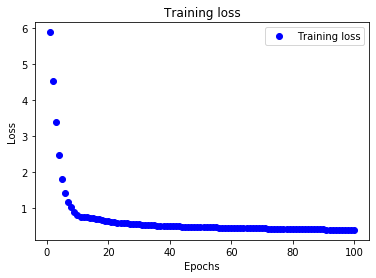

In [ ]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history_dict['acc']
loss = history_dict['loss']
epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

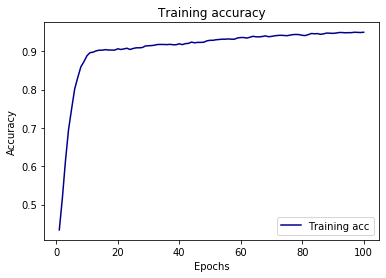

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, color='darkblue', label='Training acc' )
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()


In [ ]:
tempString = 'সরকারি'
Y = [0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0]
tempInput = np.zeros(shape=(1,10))
count = 0
for i in tempString:
  tempInput[0][count]= ord(i) - 2400
  count = count + 1
print(tempInput)
probabilities = model.predict(tempInput)
prediction = pd.DataFrame(probabilities, columns=['অ','আ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','খ','গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়'])
accuracy = np.mean(probabilities == Y)
print(prediction)


[[88. 80. 53. 94. 80. 95.  0.  0.  0.  0.]]
          অ         আ         ই  ...             ড়             ঢ়    য়
0  0.736223  0.880748  0.266705  ...  5.960464e-07  3.035145e-07  0.0

[1 rows x 46 columns]
